In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import re

In [13]:
with open("long_story.txt", 'r', encoding="utf-8") as f:
    data = f.read()

    
data = re.sub(r'[^a-zA-Z\s]', '', data.lower())

print(len(data))
data[:1000]

25567


'dennis floated through the air like a leaf with dreams of flying the world around him shimmered with uncertainty hills rose and fell like breathing creatures trees bent backwards to admire their own roots the sky was a deep shade of maybe dennis did not question it he had learned not to\n\nhe remembered what the spoon had said or what it had meant or maybe just what it had not said but implied through its absence the quest for the rubber duckies of ambiguity was now everything susan walked beside him or glided or hovered it was hard to tell she was no longer made of triangles but of soft music and forgotten dreams dennis liked this version of her better less sharp more gentle\n\nthey passed a lake that reflected nothing not the trees not the clouds not even dennis he stared into it for a while and felt nothing stare back susan said something without saying it dennis nodded they moved on\n\nthe first waffle of nowhere was guarded by a large owl who believed it was a pancake it sat atop

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
total = len(tokenizer.word_index) + 1

input_sequences = []
for line in data.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)
        
max_len = max(len(x) for x in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]
ys = to_categorical(labels, num_classes=total)

In [15]:
def create_model(model_type='RNN'):
    model = Sequential()
    model.add(Embedding(total, 100))
    
    if model_type == 'RNN':
        model.add(SimpleRNN(256))
    elif model_type == 'LSTM':
        model.add(LSTM(256))
    elif model_type == 'GRU':
        model.add(GRU(256))
        
    model.add(Dense(total, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

es = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)


In [16]:
rnn_model = create_model('RNN')
rnn_history = rnn_model.fit(xs, ys, epochs = 100, callbacks = [es], verbose=1, batch_size=512)

Epoch 1/100
9/9 [==============================] - 4s 245ms/step - loss: 6.6572 - accuracy: 0.0310
Epoch 2/100
9/9 [==============================] - 2s 226ms/step - loss: 5.9986 - accuracy: 0.0563
Epoch 3/100
9/9 [==============================] - 2s 174ms/step - loss: 5.9309 - accuracy: 0.0563
Epoch 4/100
9/9 [==============================] - 2s 225ms/step - loss: 5.9070 - accuracy: 0.0563
Epoch 5/100
9/9 [==============================] - 2s 247ms/step - loss: 5.8885 - accuracy: 0.0563
Epoch 6/100
9/9 [==============================] - 2s 233ms/step - loss: 5.8827 - accuracy: 0.0563
Epoch 7/100
9/9 [==============================] - 2s 257ms/step - loss: 5.8723 - accuracy: 0.0563
Epoch 8/100
9/9 [==============================] - 2s 245ms/step - loss: 5.8636 - accuracy: 0.0563
Epoch 9/100
9/9 [==============================] - 2s 229ms/step - loss: 5.8459 - accuracy: 0.0563
Epoch 10/100
9/9 [==============================] - 2s 222ms/step - loss: 5.8259 - accuracy: 0.0563
Epoch 11/

In [17]:
lstm_model = create_model('LSTM')
lstm_history = lstm_model.fit(xs, ys, epochs = 250, callbacks = [es], verbose=1, validation_split=0.1, batch_size=512)

Epoch 1/250
9/9 [==============================] - 7s 179ms/step - loss: 6.9235 - accuracy: 0.0460 - val_loss: 6.4317 - val_accuracy: 0.0436
Epoch 2/250
9/9 [==============================] - 0s 53ms/step - loss: 6.1322 - accuracy: 0.0577 - val_loss: 6.0911 - val_accuracy: 0.0436
Epoch 3/250
9/9 [==============================] - 1s 62ms/step - loss: 5.9476 - accuracy: 0.0577 - val_loss: 6.1765 - val_accuracy: 0.0436
Epoch 4/250
9/9 [==============================] - 0s 54ms/step - loss: 5.8985 - accuracy: 0.0577 - val_loss: 6.2333 - val_accuracy: 0.0436
Epoch 5/250
9/9 [==============================] - 1s 60ms/step - loss: 5.8848 - accuracy: 0.0577 - val_loss: 6.2559 - val_accuracy: 0.0436
Epoch 6/250
9/9 [==============================] - 1s 57ms/step - loss: 5.8787 - accuracy: 0.0577 - val_loss: 6.2698 - val_accuracy: 0.0436
Epoch 7/250
9/9 [==============================] - 0s 50ms/step - loss: 5.8769 - accuracy: 0.0577 - val_loss: 6.2764 - val_accuracy: 0.0436
Epoch 8/250
9/9 [==

In [18]:
gru_model = create_model('GRU')
gru_history = gru_model.fit(xs, ys, epochs = 250, callbacks = [es], verbose=1, batch_size=512)

Epoch 1/250
9/9 [==============================] - 3s 62ms/step - loss: 6.9764 - accuracy: 0.0445
Epoch 2/250
9/9 [==============================] - 0s 46ms/step - loss: 6.3940 - accuracy: 0.0563
Epoch 3/250
9/9 [==============================] - 0s 39ms/step - loss: 5.9823 - accuracy: 0.0379
Epoch 4/250
9/9 [==============================] - 0s 41ms/step - loss: 5.9347 - accuracy: 0.0371
Epoch 5/250
9/9 [==============================] - 0s 35ms/step - loss: 5.8910 - accuracy: 0.0563
Epoch 6/250
9/9 [==============================] - 0s 40ms/step - loss: 5.8729 - accuracy: 0.0563
Epoch 7/250
9/9 [==============================] - 0s 44ms/step - loss: 5.8576 - accuracy: 0.0563
Epoch 8/250
9/9 [==============================] - 0s 45ms/step - loss: 5.8419 - accuracy: 0.0563
Epoch 9/250
9/9 [==============================] - 0s 47ms/step - loss: 5.8188 - accuracy: 0.0563
Epoch 10/250
9/9 [==============================] - 0s 47ms/step - loss: 5.7825 - accuracy: 0.0569
Epoch 11/250
9/9 [=

In [19]:
def predict_next_word(model, seed_text, next_words=1):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        next_word = tokenizer.index_word[np.argmax(predicted)]
        seed_text += ' ' + next_word
    return seed_text

In [20]:
print("The Second Waffle...")
print(f"RNN: {predict_next_word(rnn_model, 'The Second Waffle', next_words=10)}")
print(f"LSTM: {predict_next_word(lstm_model, 'The Second Waffle', next_words=10)}")
print(f"GRU: {predict_next_word(gru_model, 'The Second Waffle', next_words=10)}")

print("\nThe Mirror Showed...")
print(f"RNN: {predict_next_word(rnn_model, 'The Mirror Showed', next_words=10)}")
print(f"LSTM: {predict_next_word(lstm_model, 'The Mirror Showed', next_words=10)}")
print(f"GRU: {predict_next_word(gru_model, 'The Mirror Showed', next_words=10)}")


The Second Waffle...


RNN: The Second Waffle of nowhere was not a place but a song it
LSTM: The Second Waffle of nowhere was not a door nor a window nor
GRU: The Second Waffle of nowhere was not a place but a song it

The Mirror Showed...
RNN: The Mirror Showed him as he had been a goat on a farm
LSTM: The Mirror Showed him as he had been a goat on a farm
GRU: The Mirror Showed him as he had been a goat on a farm


In [21]:
test_loss1, test_acc1 = rnn_model.evaluate(xs, ys)
print(f"RNN Test Accuracy: {test_acc1:.4f}")

test_loss2, test_acc2 = lstm_model.evaluate(xs, ys)
print(f"LSTM Test Accuracy: {test_acc2:.4f}")

test_loss3, test_acc3 = gru_model.evaluate(xs, ys)
print(f"GRU Test Accuracy: {test_acc3:.4f}")


144/144 [==============================] - 5s 30ms/step - loss: 0.1143 - accuracy: 0.9788
RNN Test Accuracy: 0.9788
144/144 [==============================] - 2s 11ms/step - loss: 1.1675 - accuracy: 0.8844
LSTM Test Accuracy: 0.8844
144/144 [==============================] - 2s 11ms/step - loss: 0.1909 - accuracy: 0.9778
GRU Test Accuracy: 0.9778


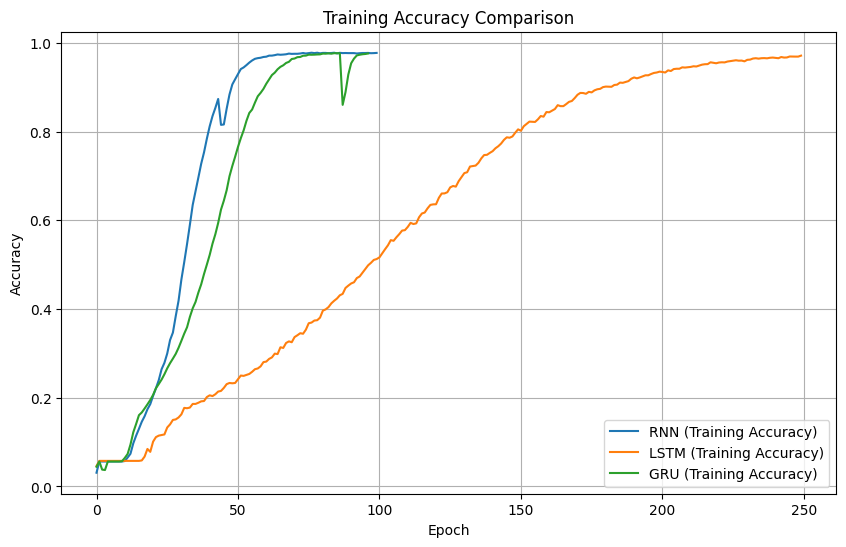

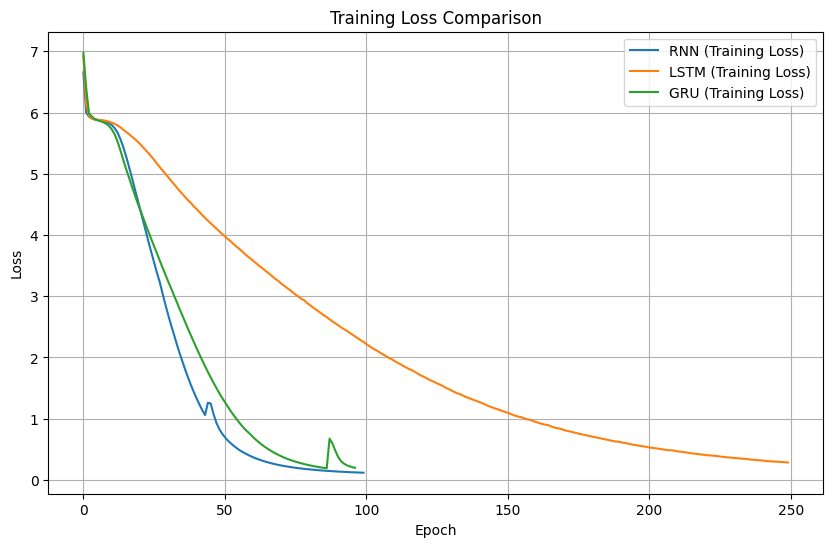

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 

plt.plot(rnn_history.history['accuracy'], label = 'RNN (Training Accuracy)')
plt.plot(lstm_history.history['accuracy'], label = 'LSTM (Training Accuracy)')
plt.plot(gru_history.history['accuracy'], label = 'GRU (Training Accuracy)')

plt.title("Training Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(rnn_history.history['loss'], label = 'RNN (Training Loss)')
plt.plot(lstm_history.history['loss'], label = 'LSTM (Training Loss)')
plt.plot(gru_history.history['loss'], label = 'GRU (Training Loss)')

plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


if 'val_accuracy' in rnn_history.history and 'val_accuracy' in lstm_history.history and 'val_accuracy' in gru_history.history:
    plt.figure(figsize=(10, 6))

    plt.plot(rnn_history.history['val_accuracy'], label = 'RNN (Validation Accuracy)')
    plt.plot(lstm_history.history['val_accuracy'], label = 'LSTM (Validation Accuracy)')
    plt.plot(gru_history.history['val_accuracy'], label = 'GRU (Validation Accuracy)')

    plt.title("Validation Accuracy Comparison")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

if 'val_loss' in rnn_history.history and 'val_loss' in lstm_history.history and 'val_loss' in gru_history.history:
    plt.figure(figsize=(10, 6))

    plt.plot(rnn_history.history['val_loss'], label = 'RNN (Validation Loss)')
    plt.plot(lstm_history.history['val_loss'], label = 'LSTM (Validation Loss)')
    plt.plot(gru_history.history['val_loss'], label = 'GRU (Validation Loss)')

    plt.title("Validation Loss Comparison")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()